In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
target = 'churn'
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Peparing and cleaning data

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# standarize data, replace spaces by _ in Column anmes and data

df.columns = df.columns.str.lower().str.replace(' ','_')

categCols = df.select_dtypes('object').columns.to_list()

for col in categCols:
    df[col] = df[col].str.lower().str.replace(' ','_')
df.head()


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [5]:
rows = []
for col in df.columns:
    rows.append([col,df[col].dtype, df[col].unique()]) 
pd.DataFrame(rows, columns=['Feature', 'Type', 'Unique Values'])

,Feature,Type,Unique Values
0,customerid,object,"[7590-vhveg, 5575-gnvde, 3668-qpybk, 7795-cfoc..."
1,gender,object,"[female, male]"
2,seniorcitizen,int64,"[0, 1]"
3,partner,object,"[yes, no]"
4,dependents,object,"[no, yes]"
5,tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,phoneservice,object,"[no, yes]"
7,multiplelines,object,"[no_phone_service, no, yes]"
8,internetservice,object,"[dsl, fiber_optic, no]"
9,onlinesecurity,object,"[no, yes, no_internet_service]"


In [6]:
# Checking Column totalcharges
print('Intended to see error: \"ValueError: Unable to parse string \"_\" at position 488\"')
pd.to_numeric(df.totalcharges)

Intended to see error: "ValueError: Unable to parse string "_" at position 488"


ValueError: Unable to parse string "_" at position 488

In [7]:
# Error shows a '_' that can't be converted
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [8]:
# Characters that couldn't be converted to numerical values show as nan
print(f'Null values for column totalcharges: {df.totalcharges.isnull().sum()}')

# Filling missing values with zero
df.totalcharges.fillna(0, inplace=True)
print(f'Null values for column totalcharges after converting to numerical and fillin NAs: {df.totalcharges.isnull().sum()}')

Null values for column totalcharges: 11
Null values for column totalcharges after converting to numerical and fillin NAs: 0


In [10]:
# Converting the target variable to binary values, no=0 or yes=1.
df.churn = (df.churn == 'yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

#### Validation framework

In [11]:
#Split data
from sklearn.model_selection import train_test_split

In [12]:
dfTrainFull, dfTest = train_test_split(df, test_size=0.2, random_state=1)
len(dfTrainFull), len(dfTest)

(5634, 1409)

In [13]:
dfTrain, dfVal = train_test_split(dfTrainFull, test_size=0.25, random_state=1)
len(dfTrain), len(dfVal), len(dfTest)

(4225, 1409, 1409)

In [14]:
dfTrain.reset_index(drop=True, inplace=True)
dfVal.reset_index(drop=True, inplace=True)
dfTest.reset_index(drop=True, inplace=True)

In [15]:
yTrain = dfTrain[target].values
yVal = dfVal[target].values
yTest = dfTest[target].values

In [16]:
del dfTrain[target]
del dfVal[target]
del dfTest[target]

#### EDA

In [17]:
dfTrainFull.reset_index(drop=True, inplace=True)

In [18]:
dfTrainFull.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.7,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.9,3160.55,1


In [19]:
# Churn rate in %
totalChurn = dfTrainFull[target].value_counts(normalize=True)[0].round(3)
totalChurn

0.73

In [28]:
numCols = ['tenure', 'monthlycharges', 'totalcharges']
categCols = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [29]:
dfTrainFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   seniorcitizen     5634 non-null   int64  
 3   partner           5634 non-null   object 
 4   dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   phoneservice      5634 non-null   object 
 7   multiplelines     5634 non-null   object 
 8   internetservice   5634 non-null   object 
 9   onlinesecurity    5634 non-null   object 
 10  onlinebackup      5634 non-null   object 
 11  deviceprotection  5634 non-null   object 
 12  techsupport       5634 non-null   object 
 13  streamingtv       5634 non-null   object 
 14  streamingmovies   5634 non-null   object 
 15  contract          5634 non-null   object 
 16  paperlessbilling  5634 non-null   object 


In [30]:
#Check unique values for the categorical variables
dfTrainFull[categCols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#### Intuition on feature importance, churn rate and risk ratio

In [31]:
def ChurnCalculations(dfT, col,totalChurn='1'):
    
    dfRisk = dfT.groupby(col).churn.agg(['mean', 'count'])
    dfRisk['diff'] = dfRisk['mean'] - totalChurn
    dfRisk['risk'] = dfRisk['mean'] / totalChurn
    
    return dfRisk

In [32]:
from IPython.display import display

In [33]:
print()
print(f'Total churn rate: {totalChurn}\n')

for col in categCols:
    print(f'{col}')
    churn = ChurnCalculations(dfTrainFull, col, totalChurn)
    display(churn)


Total churn rate: 0.73

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,-0.453176,0.379211
male,0.263214,2838,-0.466786,0.360566


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.487730,0.331877
1,0.413377,912,-0.316623,0.566270


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,-0.400191,0.451793
yes,0.205033,2702,-0.524967,0.280868


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,-0.416240,0.429808
yes,0.165666,1666,-0.564334,0.226940


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.488684,0.33057
yes,0.273049,5087,-0.456951,0.37404


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.472593,0.352613
no_phone_service,0.241316,547,-0.488684,0.330570
yes,0.290742,2387,-0.439258,0.398276


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.537653,0.263490
fiber_optic,0.425171,2479,-0.304829,0.582427
no,0.077805,1221,-0.652195,0.106582


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,-0.309079,0.576604
no_internet_service,0.077805,1221,-0.652195,0.106582
yes,0.153226,1612,-0.576774,0.209898


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,-0.325677,0.553868
no_internet_service,0.077805,1221,-0.652195,0.106582
yes,0.217232,1915,-0.512768,0.297579


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,-0.334125,0.542295
no_internet_service,0.077805,1221,-0.652195,0.106582
yes,0.230412,1940,-0.499588,0.315633


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,-0.311086,0.573855
no_internet_service,0.077805,1221,-0.652195,0.106582
yes,0.159926,1632,-0.570074,0.219077


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,-0.387168,0.469632
no_internet_service,0.077805,1221,-0.652195,0.106582
yes,0.302723,2167,-0.427277,0.414689


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,-0.391094,0.464255
no_internet_service,0.077805,1221,-0.652195,0.106582
yes,0.307273,2200,-0.422727,0.420922


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,-0.298299,0.591371
one_year,0.120573,1186,-0.609427,0.165169
two_year,0.028274,1344,-0.701726,0.038731


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.557929,0.235714
yes,0.338151,3321,-0.391849,0.463221


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.561829,0.230371
credit_card_(automatic),0.164339,1217,-0.565661,0.225121
electronic_check,0.455890,1893,-0.274110,0.624507
mailed_check,0.193870,1305,-0.536130,0.265575


#### Feature importance: mutual information

In [34]:
from sklearn.metrics import mutual_info_score

In [35]:
mutual_info_score(dfTrainFull.churn, dfTrainFull.contract)

0.0983203874041556

In [36]:
def MutualInfoChurn(data):
    return mutual_info_score(data, dfTrainFull.churn)

In [37]:
mutualInfo = dfTrainFull[categCols].apply(MutualInfoChurn)
mutualInfo.sort_values(ascending=False, inplace=True)
mutualInfo

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

#### Feature importance, Correlation

In [38]:
dfTrainFull.corrwith(dfTrainFull.churn)

seniorcitizen     0.141966
tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
churn             1.000000
dtype: float64

In [39]:
print(f'Tenure <= 2: {dfTrainFull.query("tenure <= 2").churn.mean()}')
print(f'2 < Tenure <= 12: {dfTrainFull.query("tenure > 2 & tenure <= 12").churn.mean()}')
print(f'Tenure <= 2: {dfTrainFull.query("tenure > 12").churn.mean()}')

Tenure <= 2: 0.5953420669577875
2 < Tenure <= 12: 0.3994413407821229
Tenure <= 2: 0.17634908339788277


In [40]:
print(f'Monthly charges <= 2: {dfTrainFull.query("monthlycharges <= 20").churn.mean()}')
print(f'20 < Monthly charges <= 50: {dfTrainFull.query("monthlycharges > 20 & monthlycharges <= 50").churn.mean()}')
print(f'Monthly charges <= 50: {dfTrainFull.query("monthlycharges > 50").churn.mean()}')

Monthly charges <= 2: 0.08795411089866156
20 < Monthly charges <= 50: 0.18340943683409436
Monthly charges <= 50: 0.32499341585462205


#### One-hot encoding

In [41]:
from sklearn.feature_extraction import DictVectorizer

In [42]:
dfTrain[['gender','contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [66]:
trainDicts = dfTrain[categCols + numCols].to_dict(orient='records')

In [67]:
trainDicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [76]:
dv = DictVectorizer(sparse=False)
XTrain = dv.fit_transform(trainDicts)
valDicts = dfVal[categCols + numCols].to_dict(orient='records')
XVal = dv.transform(valDicts)

In [77]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [78]:
print(XTrain.shape, XVal.shape)

(4225, 45) (1409, 45)


#### Logistic regression

In [85]:
# Checking how the sigmoid function looks
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
z = np.linspace(-7, 7, 51)

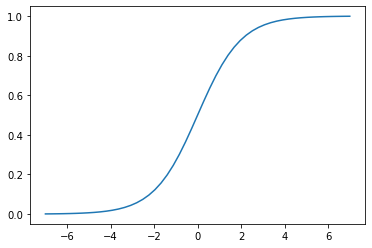

In [86]:
_ = plt.plot(z, sigmoid(z))

In [87]:
# Checking how linear regression looks
def logisticRegression(x):
    score = w0
    
    for j in range(len(x)):
        score += x[j] + w[j]
        
    result = sigmoid(score)
    return result

#### Training logistic regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
model = LogisticRegression()
model.fit(XTrain, yTrain)

LogisticRegression()

In [90]:
model.intercept_

array([-0.10904524])

In [91]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [110]:
# Hard predictions
model.predict(XTrain)

array([0, 1, 1, ..., 1, 0, 1])

In [111]:
# Soft predictions - Churn probability will be column 1
yValPred = model.predict_proba(XVal)[:,1]

In [112]:
yValPredictions = (yValPred >= 0.5)

In [113]:
dfVal[yValPredictions].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [114]:
(yValPredictions == yVal).mean()

0.8034066713981547

#### Model Interpretation

In [118]:
list(zip(dv.get_feature_names(), model.coef_[0]. round(3)))

[('contract=month-to-month', 0.475),
 ('contract=one_year', -0.175),
 ('contract=two_year', -0.408),
 ('dependents=no', -0.03),
 ('dependents=yes', -0.078),
 ('deviceprotection=no', 0.063),
 ('deviceprotection=no_internet_service', -0.089),
 ('deviceprotection=yes', -0.081),
 ('gender=female', -0.034),
 ('gender=male', -0.073),
 ('internetservice=dsl', -0.335),
 ('internetservice=fiber_optic', 0.317),
 ('internetservice=no', -0.089),
 ('monthlycharges', 0.004),
 ('multiplelines=no', -0.258),
 ('multiplelines=no_phone_service', 0.141),
 ('multiplelines=yes', 0.009),
 ('onlinebackup=no', 0.063),
 ('onlinebackup=no_internet_service', -0.089),
 ('onlinebackup=yes', -0.081),
 ('onlinesecurity=no', 0.266),
 ('onlinesecurity=no_internet_service', -0.089),
 ('onlinesecurity=yes', -0.284),
 ('paperlessbilling=no', -0.231),
 ('paperlessbilling=yes', 0.124),
 ('partner=no', -0.166),
 ('partner=yes', 0.058),
 ('paymentmethod=bank_transfer_(automatic)', -0.087),
 ('paymentmethod=credit_card_(automa

#### Using the model

In [151]:
trainFullDicts = dfTrainFull[categCols + numCols].to_dict(orient='records')

In [152]:
dv = DictVectorizer(sparse=False)
XTrainFull = dv.fit_transform(trainFullDicts)
yTrainFull = dfTrainFull.churn.values

In [125]:
model = LogisticRegression()
model.fit(XTrainFull, yTrainFull)

LogisticRegression()

In [153]:
testFullDicts = dfTest[categCols + numCols].to_dict(orient='records')
XTestFull = dv.transform(testFullDicts)

In [154]:
yTestPred = model.predict_proba(XTestFull)[:, 1]

In [155]:
yTestPredictions = (yTestPred >= 0.5)
yTestPredictions * 1

array([0, 0, 0, ..., 0, 0, 1])

In [198]:
print(yTestPredictions[:5]*1)
print(yTest[:5])

[0 0 0 1 0]
[0 0 0 1 0]


In [158]:
(yTestPredictions == yTest).mean()

0.815471965933286

In [171]:
customer1 = testFullDicts[10]
customer2 = testFullDicts[-1]

In [177]:
XCustomer1 = dv.transform([customer1])
XCustomer2 = dv.transform([customer2])

In [201]:
model.predict_proba(XCustomer1)[0,1], yTest[-1]

(0.4056810977886026, 1)

In [202]:
model.predict_proba(XCustomer2)[0,1], yTest[-1]

(0.5968852088278249, 1)